In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import GridSearchCV



In [2]:
data = pd.read_csv("letter-recognition.data", header=None)

In [3]:
data = data[data[0].isin(['A', 'B'])]

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
33,B,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7
78,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
118,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,A,6,10,7,6,3,12,0,4,1,11,4,12,4,4,3,11
19962,B,4,8,6,6,5,7,8,6,6,10,6,6,3,8,7,8
19966,A,2,3,3,1,1,6,2,2,1,5,2,8,1,6,1,7
19977,A,3,9,5,6,2,6,5,3,1,6,1,8,2,7,2,7


In [5]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.00000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,3.656592,6.969132,5.108682,5.174277,3.781994,8.270096,5.321543,4.041801,3.78135,7.877170,3.899035,7.572347,2.942122,7.108682,4.716399,8.272669
std,1.710107,3.371899,1.736250,2.195082,2.159218,1.732898,2.247153,2.194864,2.12051,1.701226,2.170522,1.393728,1.618107,1.347249,2.481324,1.614842
min,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.00000,3.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,4.000000,4.000000,4.000000,2.000000,7.000000,3.000000,2.000000,2.00000,7.000000,2.000000,7.000000,2.000000,6.000000,3.000000,7.000000
50%,3.000000,7.000000,5.000000,5.000000,3.000000,8.000000,6.000000,3.000000,4.00000,7.000000,4.000000,8.000000,2.000000,7.000000,5.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,9.000000,7.000000,5.000000,6.00000,9.000000,6.000000,8.000000,3.000000,8.000000,7.000000,9.000000
max,11.000000,15.000000,11.000000,9.000000,12.000000,14.000000,10.000000,10.000000,8.00000,12.000000,9.000000,14.000000,9.000000,12.000000,12.000000,12.000000


In [6]:
data[0] = data[0].replace('A', 0)
data[0] = data[0].replace('B', 1)

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
6,1,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,0,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
33,1,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7
78,0,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
118,0,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,0,6,10,7,6,3,12,0,4,1,11,4,12,4,4,3,11
19962,1,4,8,6,6,5,7,8,6,6,10,6,6,3,8,7,8
19966,0,2,3,3,1,1,6,2,2,1,5,2,8,1,6,1,7
19977,0,3,9,5,6,2,6,5,3,1,6,1,8,2,7,2,7


In [8]:
X = data.iloc[:, 1:]
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
6,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
33,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7
78,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
118,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,6,10,7,6,3,12,0,4,1,11,4,12,4,4,3,11
19962,4,8,6,6,5,7,8,6,6,10,6,6,3,8,7,8
19966,2,3,3,1,1,6,2,2,1,5,2,8,1,6,1,7
19977,3,9,5,6,2,6,5,3,1,6,1,8,2,7,2,7


In [9]:
y= data[0]
y

6        1
7        0
33       1
78       0
118      0
        ..
19951    0
19962    1
19966    0
19977    0
19999    0
Name: 0, Length: 1555, dtype: int64

<Axes: >

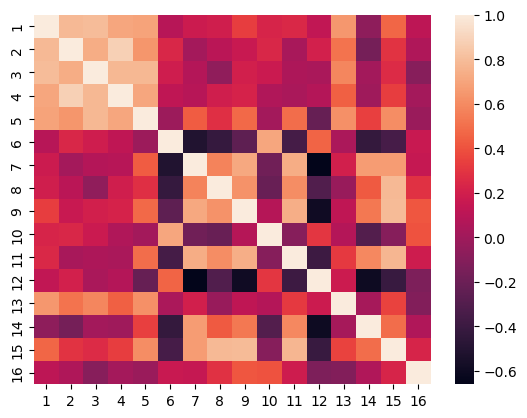

In [10]:
sb.heatmap(X.corr())

In [11]:
X['17'] = (X[1] + X[2])/2

combine x and y values to create position

In [12]:
X['18'] = (X[3] * X[4])

combine width and height to create area

In [13]:
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
6,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10,3.0,20
7,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7,1.0,6
33,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7,7.0,49
78,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8,5.0,25
118,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7,5.5,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,6,10,7,6,3,12,0,4,1,11,4,12,4,4,3,11,8.0,42
19962,4,8,6,6,5,7,8,6,6,10,6,6,3,8,7,8,6.0,36
19966,2,3,3,1,1,6,2,2,1,5,2,8,1,6,1,7,2.5,3
19977,3,9,5,6,2,6,5,3,1,6,1,8,2,7,2,7,6.0,30


In [14]:
X.drop(data.columns[1:5], axis=1, inplace=True)

<Axes: >

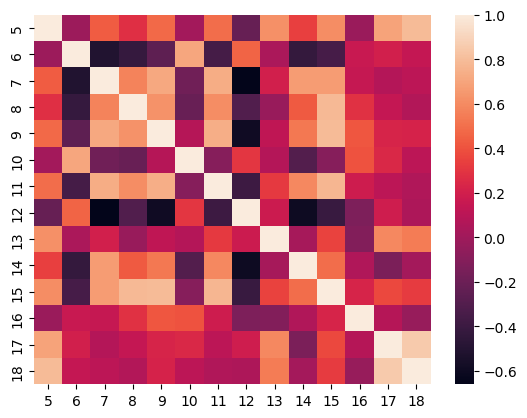

In [15]:
sb.heatmap(X.corr())

still seeing big similarities from 17 position and 18 area features....

going to drop position, as area should be more fitting to describe the shape of a letter

In [16]:
X.drop('17', axis=1, inplace=True)

In [17]:
X

,5,6,7,8,9,10,11,12,13,14,15,16,18
6,4,8,7,6,6,7,6,6,2,8,7,10,20
7,1,8,2,2,2,8,2,8,1,6,2,7,6
33,10,9,8,4,4,6,8,6,6,11,8,7,49
78,3,12,2,3,2,10,2,9,2,6,3,8,25
118,3,9,2,2,3,8,2,8,2,6,3,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,3,12,0,4,1,11,4,12,4,4,3,11,42
19962,5,7,8,6,6,10,6,6,3,8,7,8,36
19966,1,6,2,2,1,5,2,8,1,6,1,7,3
19977,2,6,5,3,1,6,1,8,2,7,2,7,30


<Axes: >

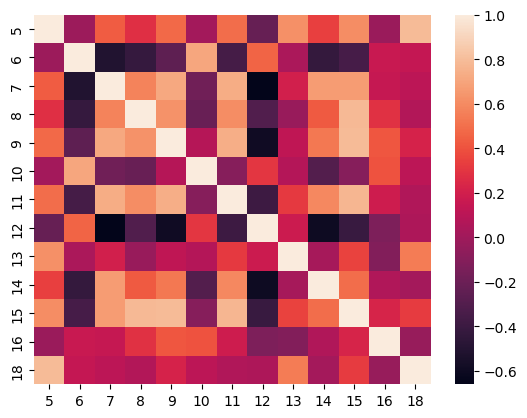

In [18]:
sb.heatmap(X.corr())

In [19]:
y

6        1
7        0
33       1
78       0
118      0
        ..
19951    0
19962    1
19966    0
19977    0
19999    0
Name: 0, Length: 1555, dtype: int64

In [20]:
X

,5,6,7,8,9,10,11,12,13,14,15,16,18
6,4,8,7,6,6,7,6,6,2,8,7,10,20
7,1,8,2,2,2,8,2,8,1,6,2,7,6
33,10,9,8,4,4,6,8,6,6,11,8,7,49
78,3,12,2,3,2,10,2,9,2,6,3,8,25
118,3,9,2,2,3,8,2,8,2,6,3,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,3,12,0,4,1,11,4,12,4,4,3,11,42
19962,5,7,8,6,6,10,6,6,3,8,7,8,36
19966,1,6,2,2,1,5,2,8,1,6,1,7,3
19977,2,6,5,3,1,6,1,8,2,7,2,7,30


In [21]:
X.rename(columns={'18': 18}, inplace=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Logistic Regression

In [23]:
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 500, 1000] }

lr_clf = LogisticRegression()

grid_search = GridSearchCV(lr_clf, param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_lr_clf = grid_search.best_estimator_

c:\Users\Miles\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Miles\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters: {'C': 1, 'max_iter': 500}


In [24]:
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'max_iter': 500}


In [25]:
LogisticRegression = best_lr_clf

start_time = time.time()
LogisticRegression.fit(X_train, y_train)
lr_pred = LogisticRegression.predict(X_test)
lr_runtime = time.time() - start_time

lr_accuracy = accuracy_score(y_test, lr_pred)

K Nearest Neighbors

In [26]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]
}

KnearestNeighbors = KNeighborsClassifier()

grid_search = GridSearchCV(KnearestNeighbors, param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_KnearestNeighbors = grid_search.best_estimator_


Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [27]:
KnearestNeighbors = best_KnearestNeighbors

start_time = time.time()
KnearestNeighbors.fit(X_train, y_train)
knn_pred = KnearestNeighbors.predict(X_test)
knn_runtime = time.time() - start_time

knn_accuracy = accuracy_score(y_test, knn_pred)

Naive Bayes

In [28]:

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7] } #only tunable parameter

nb_clf = GaussianNB()

grid_search = GridSearchCV(nb_clf, param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_nb_clf = grid_search.best_estimator_


Best Parameters: {'var_smoothing': 1e-09}


In [29]:
nb_clf = best_nb_clf
start_time = time.time()

nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_runtime = time.time() - start_time

nb_accuracy = accuracy_score(y_test, nb_pred)

In [30]:
print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("\n")
print("Naive Bayes Runtime:", nb_runtime)
print("Logistic Regression Runtime:", lr_runtime)
print("KNN Runtime:", knn_runtime)

Naive Bayes Accuracy: 0.9646302250803859
Logistic Regression Accuracy: 0.9967845659163987
KNN Accuracy: 0.9935691318327974


Naive Bayes Runtime: 0.003002643585205078
Logistic Regression Runtime: 0.03403115272521973
KNN Runtime: 0.0070056915283203125
